## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZES = [32, 128, 256] #2, 16, 
MOMENTUM = 0.95

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in BATCH_SIZES:
    keras.backend.clear_session()
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=regulizer_ratio, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "BATCH_SIZE-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}   

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               3289

50000/50000 [==============================] - 59s 1ms/step - loss: 0.3035 - accuracy: 0.8918 - val_loss: 2.0163 - val_accuracy: 0.5406s - loss: 0.3031 - accura
Epoch 45/50
50000/50000 [==============================] - 54s 1ms/step - loss: 0.2911 - accuracy: 0.8958 - val_loss: 2.0637 - val_accuracy: 0.5337
Epoch 46/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.2881 - accuracy: 0.8972 - val_loss: 2.0641 - val_accuracy: 0.5310
Epoch 47/50
50000/50000 [==============================] - 98s 2ms/step - loss: 0.2890 - accuracy: 0.8970 - val_loss: 2.0745 - val_accuracy: 0.5333
Epoch 48/50
50000/50000 [==============================] - 80s 2ms/step - loss: 0.2767 - accuracy: 0.9030 - val_loss: 2.0828 - val_accuracy: 0.5311
Epoch 49/50
50000/50000 [==============================] - 83s 2ms/step - loss: 0.2720 - accuracy: 0.9030 - val_loss: 2.0916 - val_accuracy: 0.5398
Epoch 50/50
50000/50000 [==============================] - 85s 2ms/step - loss: 0.2611 - accuracy: 

Epoch 39/50
50000/50000 [==============================] - 16s 315us/step - loss: 0.0942 - accuracy: 0.9727 - val_loss: 2.3753 - val_accuracy: 0.5280
Epoch 40/50
50000/50000 [==============================] - 16s 312us/step - loss: 0.0885 - accuracy: 0.9738 - val_loss: 2.4259 - val_accuracy: 0.5260
Epoch 41/50
50000/50000 [==============================] - 16s 312us/step - loss: 0.0868 - accuracy: 0.9740 - val_loss: 2.4645 - val_accuracy: 0.5268
Epoch 42/50
50000/50000 [==============================] - 16s 315us/step - loss: 0.0845 - accuracy: 0.9754 - val_loss: 2.4722 - val_accuracy: 0.5282
Epoch 43/50
50000/50000 [==============================] - 16s 318us/step - loss: 0.0750 - accuracy: 0.9787 - val_loss: 2.4934 - val_accuracy: 0.5300
Epoch 44/50
50000/50000 [==============================] - 16s 312us/step - loss: 0.0765 - accuracy: 0.9774 - val_loss: 2.5387 - val_accuracy: 0.5231
Epoch 45/50
50000/50000 [==============================] - 16s 311us/step - loss: 0.0752 - accuracy:

Epoch 34/50
50000/50000 [==============================] - 13s 251us/step - loss: 0.1207 - accuracy: 0.9753 - val_loss: 2.1127 - val_accuracy: 0.5070
Epoch 35/50
50000/50000 [==============================] - 13s 252us/step - loss: 0.1075 - accuracy: 0.9789 - val_loss: 2.1387 - val_accuracy: 0.5106
Epoch 36/50
50000/50000 [==============================] - 13s 254us/step - loss: 0.1005 - accuracy: 0.9809 - val_loss: 2.1850 - val_accuracy: 0.5039
Epoch 37/50
50000/50000 [==============================] - 13s 256us/step - loss: 0.0925 - accuracy: 0.9823 - val_loss: 2.1937 - val_accuracy: 0.5107
Epoch 38/50
50000/50000 [==============================] - 13s 251us/step - loss: 0.0818 - accuracy: 0.9858 - val_loss: 2.2342 - val_accuracy: 0.5100
Epoch 39/50
50000/50000 [==============================] - 13s 259us/step - loss: 0.0774 - accuracy: 0.9862 - val_loss: 2.2499 - val_accuracy: 0.5085
Epoch 40/50
50000/50000 [==============================] - 11s 211us/step - loss: 0.0668 - accuracy:

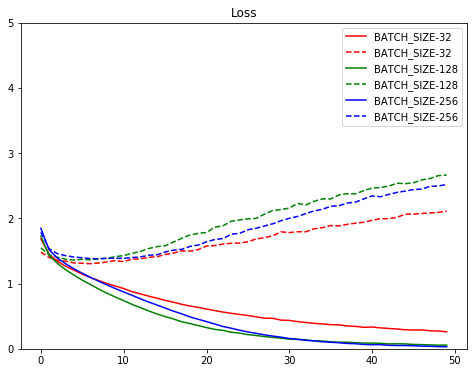

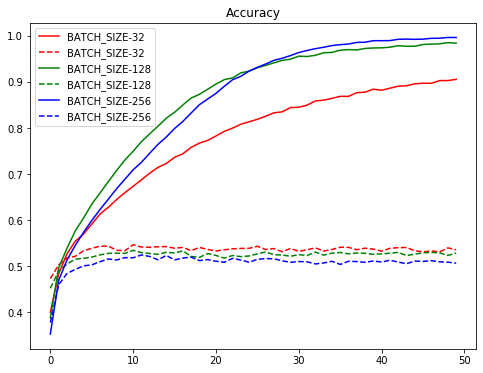

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()